# CS 2100/4700: Introduction to Machine Learning -- Exploratory Data Analysis (EDA)

## Why EDA Matters

> "You can't build a good model if you don't understand your data."

### The EDA Value Chain

```
UNDERSTAND DATA  -->  CREATE BETTER FEATURES  -->  BUILD BETTER MODELS
```

### What Happens Without EDA?

| Skipping EDA | Consequence |
|--------------|-------------|
| Miss class imbalance | Model predicts majority class only |
| Miss outliers | Model fits to extreme values |
| Miss correlations | Redundant features |
| Miss distributions | Wrong algorithm choice |

## Learning Objectives

By the end of this lecture, you will be able to:

1. Apply a systematic EDA methodology
2. Perform univariate analysis on numeric and categorical data
3. Perform bivariate and multivariate analysis
4. Analyze target variable distributions
5. Detect outliers using multiple methods
6. Create an EDA report for any dataset

## Setup: Load and Prepare Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set visual style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

# Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
           'marital_status', 'occupation', 'relationship', 'race',
           'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
           'native_country', 'income']
df = pd.read_csv(url, names=columns, na_values='?', skipinitialspace=True)

# Quick clean
df = df.dropna()
df['income_binary'] = (df['income'] == '>50K').astype(int)

# Define column groups
numeric_cols = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 
                    'relationship', 'race', 'sex', 'income']

print(f"Dataset: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"Target: 'income' - Binary classification")

Dataset: 30,162 rows, 16 columns
Target: 'income' - Binary classification


## 1. EDA Philosophy and Workflow

### The Two Types of EDA

| Type | Purpose | Tools |
|------|---------|-------|
| **Statistical EDA** | Quantify patterns with numbers | mean, std, correlation |
| **Visual EDA** | See patterns intuitively | histograms, scatter plots |

**Best Practice:** Always use BOTH!

### The EDA Workflow

```
1. UNIVARIATE     →  Understand each variable ALONE
2. BIVARIATE      →  Understand PAIRS of variables
3. TARGET         →  Understand what you're PREDICTING
4. OUTLIERS       →  Find unusual observations
```

## 2. Univariate Analysis: Numerical Data

**Goal:** Understand EACH numerical variable independently.

### 2.1 Key Statistics

| Statistic | What It Tells You | Red Flags |
|-----------|-------------------|----------|
| **Mean vs Median** | Symmetry | Very different = skewed |
| **Std Dev** | Spread | Very large = high variance |
| **Skewness** | Asymmetry | \|skew\| > 1 = highly skewed |

In [2]:
# Basic statistics
print("="*60)
print("NUMERICAL VARIABLE SUMMARY")
print("="*60)
print(df[numeric_cols].describe().round(2))

NUMERICAL VARIABLE SUMMARY
            age  education_num  capital_gain  capital_loss  hours_per_week
count  30162.00       30162.00      30162.00      30162.00        30162.00
mean      38.44          10.12       1092.01         88.37           40.93
std       13.13           2.55       7406.35        404.30           11.98
min       17.00           1.00          0.00          0.00            1.00
25%       28.00           9.00          0.00          0.00           40.00
50%       37.00          10.00          0.00          0.00           40.00
75%       47.00          13.00          0.00          0.00           45.00
max       90.00          16.00      99999.00       4356.00           99.00


### 2.2 Detailed Analysis with Interpretation

In [3]:
print("="*60)
print("DETAILED NUMERICAL ANALYSIS")
print("="*60)

for col in numeric_cols:
    print(f"\n {col.upper()}")
    print("-" * 40)
    
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    skew = df[col].skew()
    
    print(f"   Mean:   {mean:,.2f}")
    print(f"   Median: {median:,.2f}")
    print(f"   Std:    {std:,.2f}")
    print(f"   Skew:   {skew:.2f}")
    
    # Interpretation
    if abs(skew) > 1:
        direction = "right" if skew > 0 else "left"
        print(f"    Highly skewed to the {direction}")
    else:
        print(f"    Roughly symmetric")

DETAILED NUMERICAL ANALYSIS

 AGE
----------------------------------------
   Mean:   38.44
   Median: 37.00
   Std:    13.13
   Skew:   0.53
    Roughly symmetric

 EDUCATION_NUM
----------------------------------------
   Mean:   10.12
   Median: 10.00
   Std:    2.55
   Skew:   -0.31
    Roughly symmetric

 CAPITAL_GAIN
----------------------------------------
   Mean:   1,092.01
   Median: 0.00
   Std:    7,406.35
   Skew:   11.90
    Highly skewed to the right

 CAPITAL_LOSS
----------------------------------------
   Mean:   88.37
   Median: 0.00
   Std:    404.30
   Skew:   4.53
    Highly skewed to the right

 HOURS_PER_WEEK
----------------------------------------
   Mean:   40.93
   Median: 40.00
   Std:    11.98
   Skew:   0.33
    Roughly symmetric


### 2.3 Visual: Histograms with Statistics

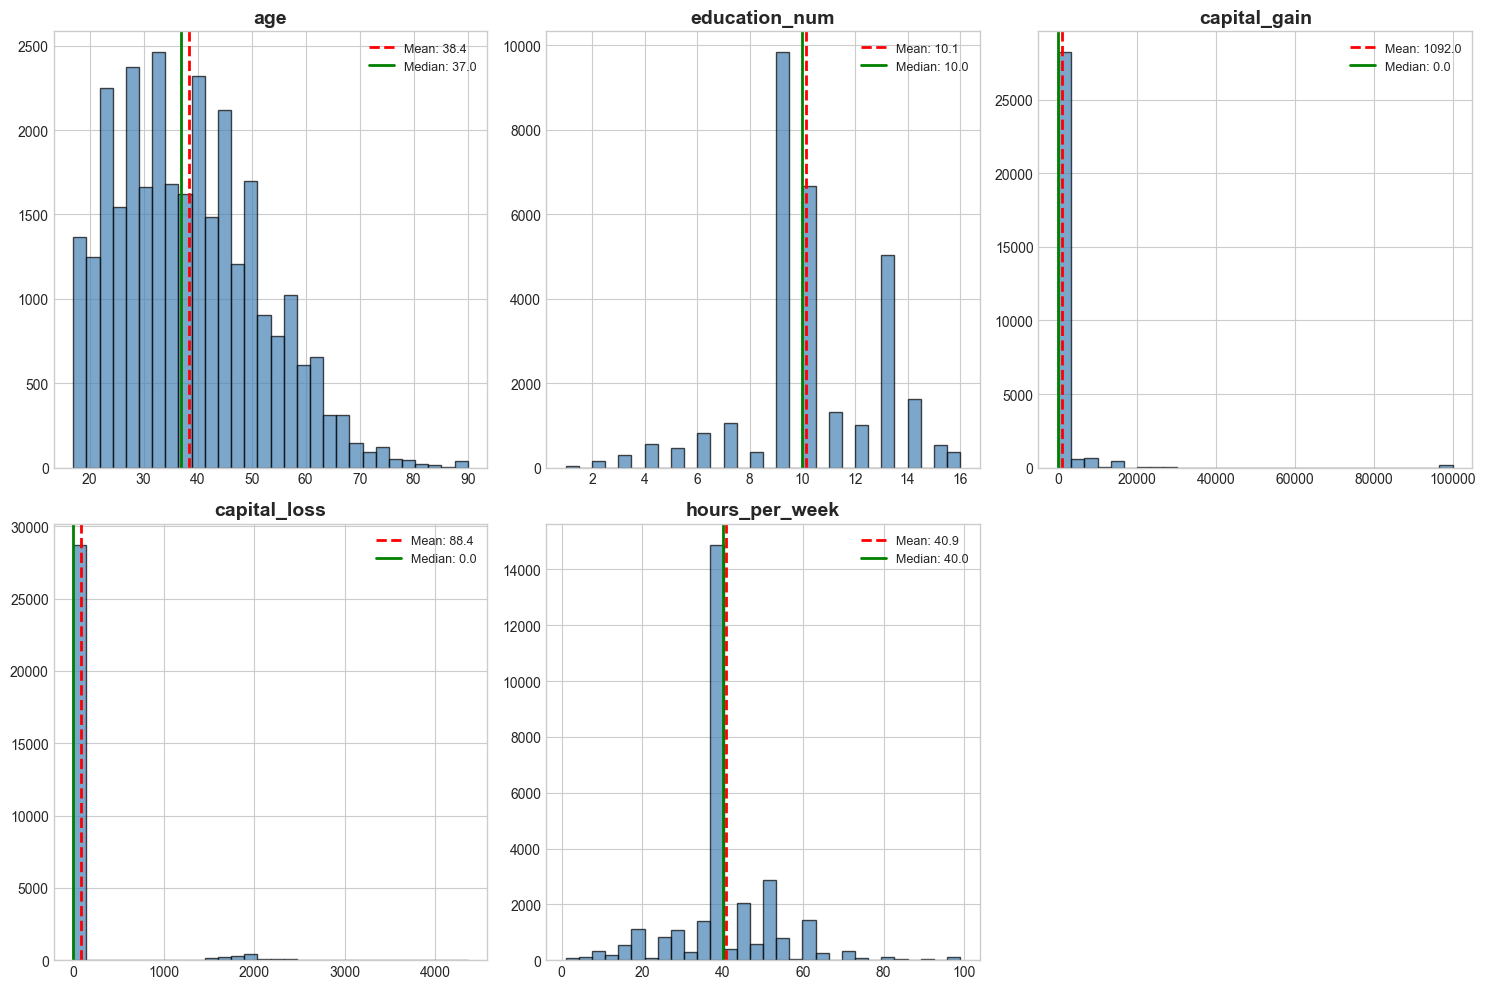

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    
    # Plot histogram
    ax.hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.1f}')
    
    ax.set_title(f'{col}', fontsize=14, fontweight='bold')
    ax.legend(fontsize=9)

axes[-1].axis('off')
plt.tight_layout()
plt.show()

### 2.4 Box Plots: Visualizing Spread and Outliers

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 5))

for ax, col in zip(axes, numeric_cols):
    bp = ax.boxplot(df[col], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.suptitle('Box Plots of Numerical Variables', fontsize=14, y=1.02)
plt.show()

### Exercise 2.1: Numerical Analysis

Analyze the `hours_per_week` variable:

In [6]:
col = 'hours_per_week'

# Task 1: Calculate these statistics
mean_val = df[col].mean()
median_val = df[col].median()
std_val = df[col].std()
min_val = df[col].min()
max_val = df[col].max()
skew_val = df[col].skew()

print(f"Mean: {mean_val:.1f}")
print(f"Median: {median_val:.1f}")
print(f"Std Dev: {std_val:.1f}")
print(f"Range: {min_val} to {max_val}")
print(f"Skewness: {skew_val:.2f}")

# Task 2: What percentage work more than 40 hours?
pct_overtime = (df[col] > 40).mean() * 100
print(f"\nWorking > 40 hours: {pct_overtime:.1f}%")

Mean: 40.9
Median: 40.0
Std Dev: 12.0
Range: 1 to 99
Skewness: 0.33

Working > 40 hours: 30.5%


**Questions to answer:**
1. Is the distribution symmetric or skewed?
2. What's the typical work week?
3. Are there outliers?

## 3. Univariate Analysis: Categorical Data

**Goal:** Understand EACH categorical variable independently.

### 3.1 Key Statistics

| Statistic | What It Tells You |
|-----------|------------------|
| **Unique** | Number of categories |
| **Mode** | Most frequent category |
| **Frequency** | Count of each category |

In [5]:
print("="*60)
print("CATEGORICAL VARIABLE SUMMARY")
print("="*60)

for col in categorical_cols:
    print(f"\n📋 {col.upper()}")
    print("-" * 40)
    print(f"   Unique values: {df[col].nunique()}")
    print(f"   Most common: {df[col].mode()[0]}")
    print(f"   Most common %: {df[col].value_counts(normalize=True).iloc[0]*100:.1f}%")

CATEGORICAL VARIABLE SUMMARY

📋 WORKCLASS
----------------------------------------
   Unique values: 7
   Most common: Private
   Most common %: 73.9%

📋 EDUCATION
----------------------------------------
   Unique values: 16
   Most common: HS-grad
   Most common %: 32.6%

📋 MARITAL_STATUS
----------------------------------------
   Unique values: 7
   Most common: Married-civ-spouse
   Most common %: 46.6%

📋 OCCUPATION
----------------------------------------
   Unique values: 14
   Most common: Prof-specialty
   Most common %: 13.4%

📋 RELATIONSHIP
----------------------------------------
   Unique values: 6
   Most common: Husband
   Most common %: 41.3%

📋 RACE
----------------------------------------
   Unique values: 5
   Most common: White
   Most common %: 86.0%

📋 SEX
----------------------------------------
   Unique values: 2
   Most common: Male
   Most common %: 67.6%

📋 INCOME
----------------------------------------
   Unique values: 2
   Most common: <=50K
   Most com

### 3.2 Frequency Tables

In [7]:
# Detailed frequency table for education
print("EDUCATION FREQUENCY TABLE")
print("="*50)

freq = df['education'].value_counts()
prop = df['education'].value_counts(normalize=True) * 100

freq_table = pd.DataFrame({
    'Count': freq,
    'Percentage': prop.round(1)
})
print(freq_table)

EDUCATION FREQUENCY TABLE
              Count  Percentage
education                      
HS-grad        9840        32.6
Some-college   6678        22.1
Bachelors      5044        16.7
Masters        1627         5.4
Assoc-voc      1307         4.3
11th           1048         3.5
Assoc-acdm     1008         3.3
10th            820         2.7
7th-8th         557         1.8
Prof-school     542         1.8
9th             455         1.5
12th            377         1.2
Doctorate       375         1.2
5th-6th         288         1.0
1st-4th         151         0.5
Preschool        45         0.1


### 3.3 Visual: Bar Charts

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Workclass
df['workclass'].value_counts().plot(kind='bar', ax=axes[0,0], color='steelblue', edgecolor='black')
axes[0,0].set_title('Workclass Distribution', fontsize=14, fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45)

# Education
df['education'].value_counts().plot(kind='bar', ax=axes[0,1], color='coral', edgecolor='black')
axes[0,1].set_title('Education Distribution', fontsize=14, fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)

# Marital Status
df['marital_status'].value_counts().plot(kind='bar', ax=axes[1,0], color='green', edgecolor='black')
axes[1,0].set_title('Marital Status Distribution', fontsize=14, fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)

# Income (Target)
colors = ['steelblue', 'coral']
df['income'].value_counts().plot(kind='bar', ax=axes[1,1], color=colors, edgecolor='black')
axes[1,1].set_title('Income Distribution (TARGET)', fontsize=14, fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### Exercise 3.1: Categorical Analysis

Analyze the `occupation` variable:

In [ ]:
# Task 1: How many unique occupations?
n_occupations = df['occupation'].nunique()
print(f"Number of occupations: {n_occupations}")

# Task 2: Top 3 most common occupations
top_3 = df['occupation'].value_counts().head(3)
print(f"\nTop 3 occupations:\n{top_3}")

# Task 3: Percentage in 'Prof-specialty'
prof_pct = (df['occupation'] == 'Prof-specialty').mean() * 100
print(f"\nProf-specialty percentage: {prof_pct:.1f}%")

## 4. Bivariate and Multivariate Analysis

**Goal:** Understand RELATIONSHIPS between variables.

### 4.1 Types of Bivariate Analysis

| Variable Types | Method | Visualization |
|----------------|--------|---------------|
| Numeric vs Numeric | Correlation | Scatter plot, heatmap |
| Categorical vs Categorical | Cross-tabulation | Stacked bar |
| Numeric vs Categorical | Group statistics | Box plot |

### 4.2 Correlation Analysis

In [ ]:
# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr().round(3)
print("CORRELATION MATRIX")
print("="*60)
print(corr_matrix)

### 4.3 Visual: Correlation Heatmap

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, vmin=-1, vmax=1,
            annot_kws={'size': 12})
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 4.4 Scatter Plots

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

pairs = [
    ('age', 'hours_per_week'),
    ('age', 'education_num'),
    ('education_num', 'hours_per_week')
]

for ax, (x_col, y_col) in zip(axes, pairs):
    ax.scatter(df[x_col], df[y_col], alpha=0.3, s=10, c='steelblue')
    corr = df[x_col].corr(df[y_col])
    ax.set_title(f'{x_col} vs {y_col}\nr = {corr:.3f}', fontsize=12, fontweight='bold')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

plt.tight_layout()
plt.show()

### 4.5 Cross-Tabulation: Categorical vs Categorical

In [ ]:
# Cross-tabulation: Sex vs Income
print("CROSS-TABULATION: Sex vs Income")
print("="*60)

# Row percentages
cross_pct = pd.crosstab(df['sex'], df['income'], normalize='index').round(3) * 100
print("\nRow Percentages:")
print(cross_pct)

print("\n📊 INTERPRETATION:")
print(f"   • {cross_pct.loc['Male', '>50K']:.1f}% of males earn >50K")
print(f"   • {cross_pct.loc['Female', '>50K']:.1f}% of females earn >50K")

### 4.6 Numeric vs Categorical: Group Comparisons

In [ ]:
# Compare age across income groups
print("AGE COMPARISON BY INCOME")
print("="*60)

age_by_income = df.groupby('income')['age'].agg(['mean', 'median', 'std'])
print(age_by_income.round(2))

### 4.7 Visual: Box Plots by Category

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Age by Income
df.boxplot(column='age', by='income', ax=axes[0])
axes[0].set_title('Age by Income', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Income')

# Hours by Income
df.boxplot(column='hours_per_week', by='income', ax=axes[1])
axes[1].set_title('Hours/Week by Income', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Income')

# Education by Income
df.boxplot(column='education_num', by='income', ax=axes[2])
axes[2].set_title('Education by Income', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Income')

plt.suptitle('')
plt.tight_layout()
plt.show()

### Exercise 4.1: Correlation Analysis

In [ ]:
# Task 1: Correlation between age and capital_gain
corr_age_cg = df['age'].corr(df['capital_gain'])
print(f"Correlation (age, capital_gain): {corr_age_cg:.3f}")

# Task 2: Correlation between education_num and hours_per_week
corr_edu_hours = df['education_num'].corr(df['hours_per_week'])
print(f"Correlation (education_num, hours_per_week): {corr_edu_hours:.3f}")

# Task 3: Which pair has the strongest correlation?
# Look at the correlation matrix above!

### Exercise 4.2: Cross-Tabulation

In [ ]:
# Create cross-tabulation of education vs income
cross_edu_income = pd.crosstab(df['education'], df['income'], normalize='index').round(3) * 100
print("Education vs Income (row percentages):")
print(cross_edu_income.sort_values('>50K', ascending=False))

# Which education has highest % of high earners?
highest = cross_edu_income['>50K'].idxmax()
print(f"\nHighest earning education: {highest}")

## 5. Target Variable Analysis

**Goal:** Deeply understand what you're trying to predict.

### 5.1 Class Balance Analysis

In [ ]:
print("="*60)
print("TARGET VARIABLE ANALYSIS: income")
print("="*60)

print("\n📊 CLASS DISTRIBUTION")
print(df['income'].value_counts())
print("\nPercentages:")
print(df['income'].value_counts(normalize=True).round(3) * 100)

# Imbalance ratio
majority = df['income'].value_counts().iloc[0]
minority = df['income'].value_counts().iloc[1]
imbalance_ratio = majority / minority

print(f"\n📈 IMBALANCE RATIO: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 3:
    print("⚠️  WARNING: Significant class imbalance!")

### 5.2 Visual: Target Distribution

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
colors = ['steelblue', 'coral']
df['income'].value_counts().plot(kind='bar', ax=axes[0], color=colors, edgecolor='black')
axes[0].set_title('Income Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
df['income'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                   colors=colors, explode=[0, 0.05])
axes[1].set_title('Income Proportions', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

### 5.3 Feature-Target Relationships

In [ ]:
print("="*60)
print("NUMERIC FEATURES BY INCOME")
print("="*60)

for col in numeric_cols:
    mean_low = df[df['income'] == '<=50K'][col].mean()
    mean_high = df[df['income'] == '>50K'][col].mean()
    diff_pct = (mean_high - mean_low) / mean_low * 100
    
    print(f"\n{col}:")
    print(f"   <=50K mean: {mean_low:,.2f}")
    print(f"   >50K mean:  {mean_high:,.2f}")
    print(f"   Difference: {diff_pct:+.1f}%")
    
    if abs(diff_pct) > 20:
        print(f"   ⭐ STRONG predictor")

### 5.4 Visual: Feature Distributions by Target

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    for income_class, color in [('<=50K', 'steelblue'), ('>50K', 'coral')]:
        subset = df[df['income'] == income_class][col]
        ax.hist(subset, bins=30, alpha=0.5, label=income_class, 
                color=color, density=True, edgecolor='black')
    ax.set_title(f'{col} by Income', fontsize=12, fontweight='bold')
    ax.legend()

axes[-1].axis('off')
plt.tight_layout()
plt.show()

### Exercise 5.1: Target Analysis

Answer these questions:
1. What percentage earns >50K?
2. Is this balanced or imbalanced?
3. Which numeric feature shows the largest difference between groups?

In [ ]:
# Your code to verify answers
pct_high = (df['income'] == '>50K').mean() * 100
print(f"Percentage earning >50K: {pct_high:.1f}%")

## 6. Detecting and Handling Outliers

### 6.1 What is an Outlier?

| Type | Example | Action |
|------|---------|--------|
| **Data Error** | Age = 999 | Fix or remove |
| **Natural Outlier** | CEO salary | Keep (it's real!) |

### 6.2 Detection Method 1: IQR

In [ ]:
def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'n_outliers': len(outliers),
        'pct_outliers': len(outliers) / len(df) * 100
    }

print("="*60)
print("OUTLIER DETECTION: IQR METHOD")
print("="*60)

for col in numeric_cols:
    result = detect_outliers_iqr(df, col)
    print(f"\n{col}:")
    print(f"   Bounds: [{result['lower_bound']:.1f}, {result['upper_bound']:.1f}]")
    print(f"   Outliers: {result['n_outliers']:,} ({result['pct_outliers']:.1f}%)")

### 6.3 Detection Method 2: Z-Score

In [ ]:
def detect_outliers_zscore(df, column, threshold=3):
    """Detect outliers using Z-score method."""
    mean = df[column].mean()
    std = df[column].std()
    z_scores = np.abs((df[column] - mean) / std)
    outliers = df[z_scores > threshold]
    
    return {
        'n_outliers': len(outliers),
        'pct_outliers': len(outliers) / len(df) * 100,
        'max_zscore': z_scores.max()
    }

print("="*60)
print("OUTLIER DETECTION: Z-SCORE (|z| > 3)")
print("="*60)

for col in numeric_cols:
    result = detect_outliers_zscore(df, col)
    print(f"\n{col}:")
    print(f"   Max |Z|: {result['max_zscore']:.2f}")
    print(f"   Outliers: {result['n_outliers']:,} ({result['pct_outliers']:.1f}%)")

### 6.4 Visual: Box Plots with Outliers

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    bp = ax.boxplot(df[col], vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    
    result = detect_outliers_iqr(df, col)
    ax.set_title(f'{col}\n{result["n_outliers"]:,} outliers ({result["pct_outliers"]:.1f}%)', 
                 fontsize=11, fontweight='bold')

axes[-1].axis('off')
plt.tight_layout()
plt.show()

### 6.5 Handling Strategies

| Strategy | When to Use | Code |
|----------|-------------|------|
| **Remove** | Clear errors | `df = df[df['col'] < upper]` |
| **Cap** | Keep but limit | `df['col'].clip(lower, upper)` |
| **Transform** | Reduce impact | `np.log1p(df['col'])` |

In [ ]:
# Example: Cap extreme values
result = detect_outliers_iqr(df, 'hours_per_week')
lower, upper = result['lower_bound'], result['upper_bound']

df_handled = df.copy()
df_handled['hours_capped'] = df_handled['hours_per_week'].clip(lower=lower, upper=upper)

print("Capping hours_per_week:")
print(f"Original range: {df['hours_per_week'].min()} to {df['hours_per_week'].max()}")
print(f"After capping:  {df_handled['hours_capped'].min():.1f} to {df_handled['hours_capped'].max():.1f}")

In [ ]:
# Example: Log transform
df_handled['capital_gain_log'] = np.log1p(df_handled['capital_gain'])

print("\nLog transform capital_gain:")
print(f"Original skew: {df['capital_gain'].skew():.2f}")
print(f"After log:     {df_handled['capital_gain_log'].skew():.2f}")

### Exercise 6.1: Outlier Detection

In [ ]:
# Task 1: Find outliers in 'age' using IQR
age_result = detect_outliers_iqr(df, 'age')
print(f"Age outliers: {age_result['n_outliers']} ({age_result['pct_outliers']:.1f}%)")

# Task 2: Find outliers in 'capital_gain' using Z-score
cg_result = detect_outliers_zscore(df, 'capital_gain')
print(f"Capital gain outliers: {cg_result['n_outliers']}")

# Task 3: Which variable has the most outliers?
# Your answer based on the analysis above

## 7. Complete EDA Report

In [ ]:
def full_eda_report(df, target_col, numeric_cols, categorical_cols):
    """Generate a comprehensive EDA report."""
    print("="*70)
    print("              COMPREHENSIVE EDA REPORT")
    print("="*70)
    
    # 1. Dataset Overview
    print("\n1. DATASET OVERVIEW")
    print("-"*50)
    print(f"   Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"   Missing: {df.isnull().sum().sum():,}")
    print(f"   Duplicates: {df.duplicated().sum():,}")
    
    # 2. Target Analysis
    print("\n2. TARGET VARIABLE")
    print("-"*50)
    for val, count in df[target_col].value_counts().items():
        print(f"   {val}: {count:,} ({count/len(df)*100:.1f}%)")
    
    # 3. Numeric Summary
    print("\n3. NUMERIC SUMMARY")
    print("-"*50)
    print(df[numeric_cols].describe().round(1).to_string())
    
    # 4. Outlier Summary
    print("\n4. OUTLIERS (IQR Method)")
    print("-"*50)
    for col in numeric_cols:
        result = detect_outliers_iqr(df, col)
        if result['pct_outliers'] > 1:
            print(f"   {col}: {result['n_outliers']:,} ({result['pct_outliers']:.1f}%)")
    
    print("\n" + "="*70)
    print("              END OF REPORT")
    print("="*70)

# Run full EDA
full_eda_report(df, 'income', numeric_cols, categorical_cols)

## Summary: EDA Checklist

### Numeric Variables:
- [ ] Calculate mean, median, std
- [ ] Check skewness
- [ ] Plot histograms and box plots
- [ ] Identify outliers

### Categorical Variables:
- [ ] Count unique values
- [ ] Calculate frequencies
- [ ] Plot bar charts

### Relationships:
- [ ] Correlation matrix and heatmap
- [ ] Cross-tabulations
- [ ] Group comparisons

### Target Variable:
- [ ] Check class balance
- [ ] Compare features by target
- [ ] Identify predictive features
